In [2]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


df = pd.read_csv('/Users/natalagrunskaa/Desktop/AirlineReviewsToLab2.csv')

to_norm_cols = df.columns
for col in to_norm_cols:
    df[col] = preprocessing.normalize([df[col]])[0]
df['AverageScore'] = df[['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating']].mean(axis= 1)    
data = df[['AverageScore','ReviewLen','AirCompanyUsage','Recommended']]
df.sample(20)


,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode,AverageScore
3742,0.000000,0.000000,0.002118,0.001132,0.000000,0.002130,0.001956,0.007922,0.002080,0.000000,0.001720,0.001535,0.002856,0.009229,0.001381
14681,0.010866,0.009446,0.010591,0.009056,0.009968,0.008519,0.005868,0.007922,0.010401,0.000000,0.001876,0.005974,0.009925,0.009229,0.009282
11932,0.000000,0.000000,0.010591,0.011321,0.009968,0.010648,0.009780,0.000000,0.010401,0.000000,0.000290,0.001452,0.008653,0.000000,0.006903
798,0.010866,0.002362,0.002118,0.001132,0.000000,0.004259,0.003912,0.000000,0.002080,0.000000,0.007885,0.002240,0.000679,0.000000,0.004266
16759,0.002716,0.007085,0.008473,0.006792,0.000000,0.008519,0.003912,0.000000,0.006241,0.000000,0.002390,0.015059,0.011367,0.000000,0.006158
6635,0.000000,0.011808,0.010591,0.011321,0.009968,0.010648,0.009780,0.007922,0.010401,0.000000,0.000089,0.003858,0.004637,0.000000,0.008871
7696,0.005433,0.004723,0.006355,0.006792,0.000000,0.006389,0.003912,0.007922,0.006241,0.008396,0.001720,0.015391,0.005316,0.000000,0.005509
6115,0.010866,0.002362,0.008473,0.003396,0.000000,0.004259,0.001956,0.007922,0.002080,0.016791,0.011950,0.003609,0.004440,0.009229,0.004999
13256,0.000000,0.000000,0.010591,0.011321,0.009968,0.010648,0.009780,0.007922,0.010401,0.000000,0.006143,0.003194,0.009275,0.000000,0.006903
4541,0.010866,0.004723,0.002118,0.003396,0.000000,0.006389,0.003912,0.007922,0.004160,0.000000,0.016083,0.004522,0.003506,0.018458,0.005361


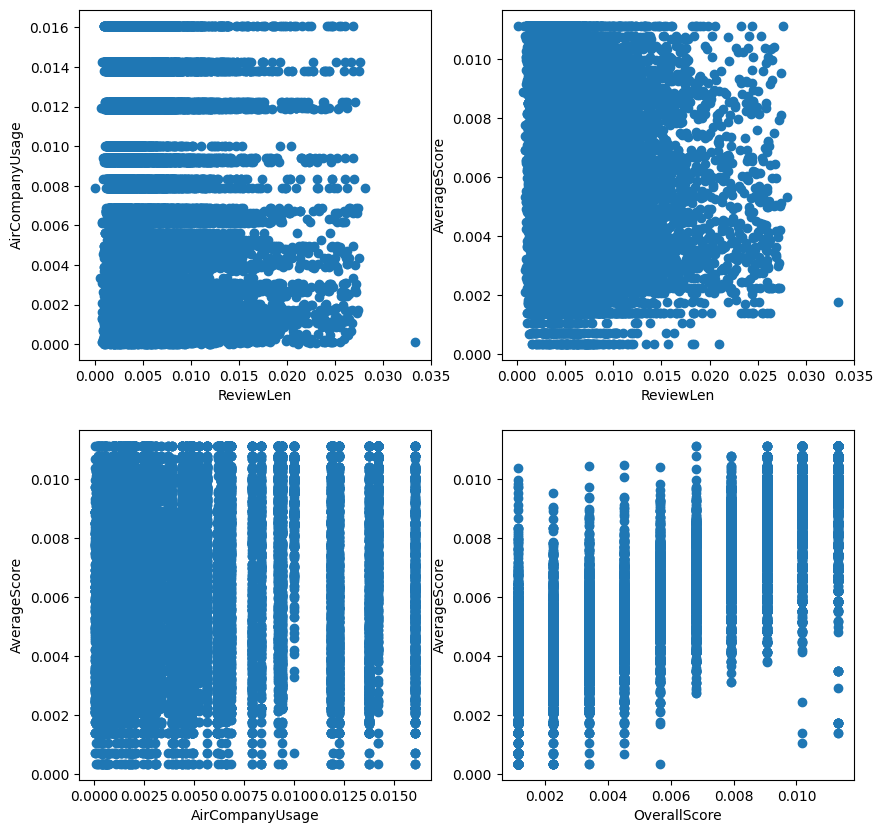

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))


ax[0][0].scatter(df["ReviewLen"], df["AirCompanyUsage"])
ax[0][0].set_xlabel("ReviewLen")
ax[0][0].set_ylabel("AirCompanyUsage")


ax[0][1].scatter(df["ReviewLen"], df["AverageScore"])
ax[0][1].set_xlabel("ReviewLen")
ax[0][1].set_ylabel("AverageScore")


ax[1][0].scatter(df["AirCompanyUsage"], df["AverageScore"])
ax[1][0].set_xlabel("AirCompanyUsage")
ax[1][0].set_ylabel("AverageScore")


ax[1][1].scatter(df["OverallScore"], df["AverageScore"])
ax[1][1].set_xlabel("OverallScore")
ax[1][1].set_ylabel("AverageScore")

plt.show()

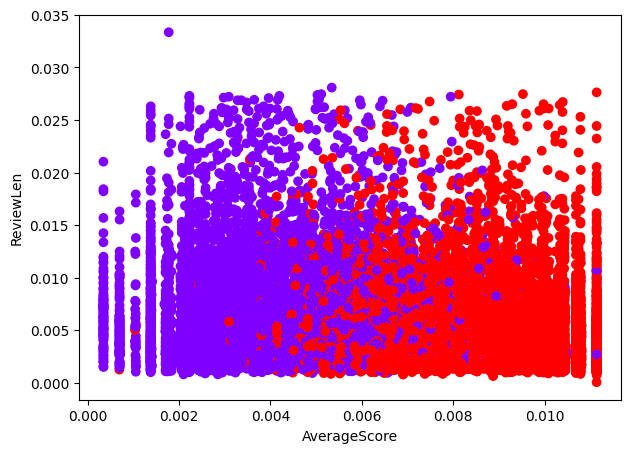

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.scatter(df.AverageScore, df.ReviewLen, c=df.Recommended, cmap='rainbow')
ax.set_xlabel("AverageScore")
ax.set_ylabel("ReviewLen")
plt.show()
# 

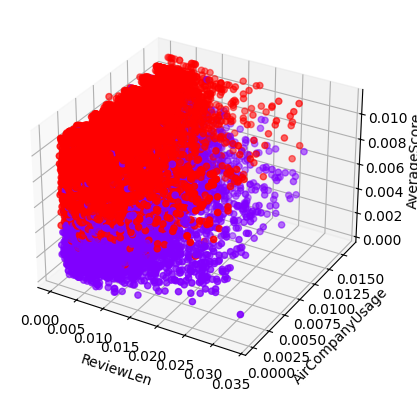

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df.ReviewLen
y = df.AirCompanyUsage
z = df.AverageScore

ax.scatter(x, y, z,c=df.Recommended, cmap='rainbow')
ax.set_xlabel("ReviewLen")
ax.set_ylabel("AirCompanyUsage")
ax.set_zlabel("AverageScore")

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4311188042240426
For n_clusters = 3 The average silhouette_score is : 0.39255852713401573
For n_clusters = 4 The average silhouette_score is : 0.4137350374089563
For n_clusters = 5 The average silhouette_score is : 0.44651587748481336


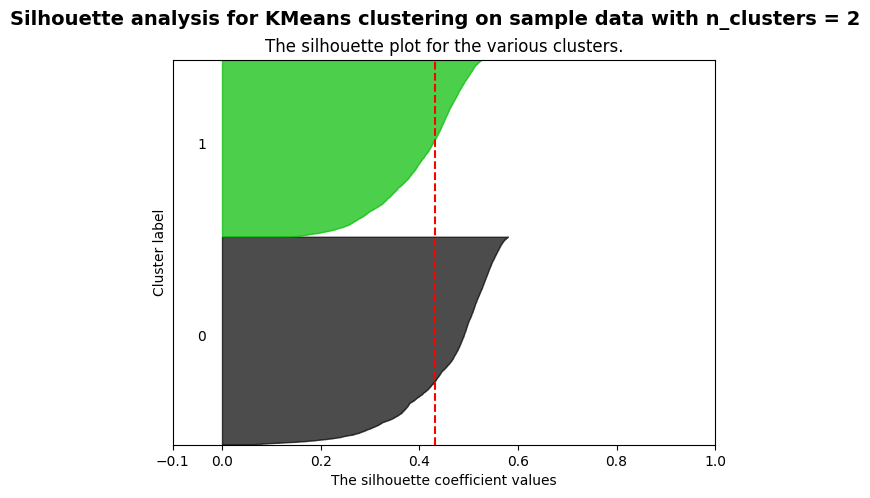

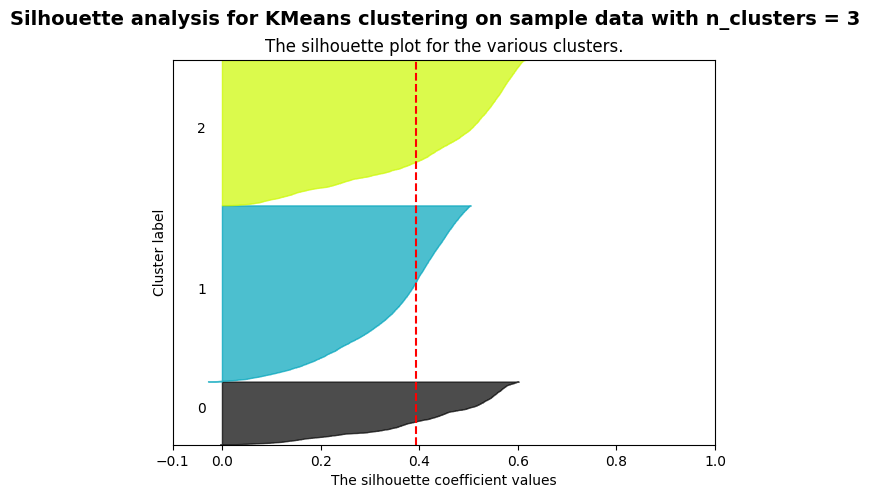

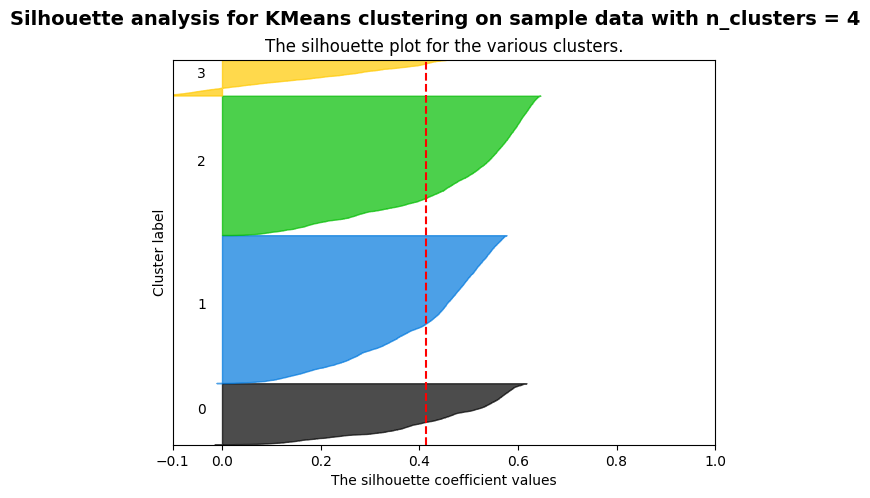

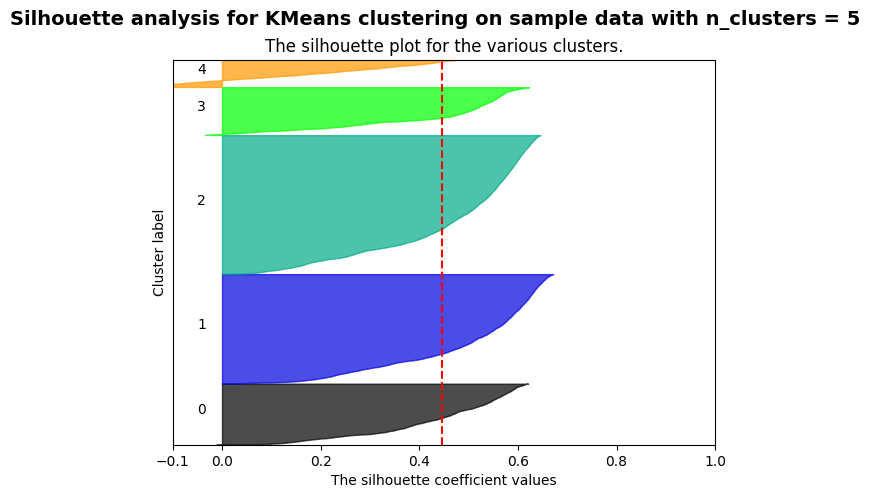

In [6]:
df_two = df[['AverageScore','ReviewLen','AirCompanyUsage','Recommended']]
df_two = data
from matplotlib import cm
from sklearn.metrics import silhouette_samples

range_n_clusters = list(range(2,6))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_two) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(df_two)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_two, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_two, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [7]:
modelk = KMeans(n_clusters=2)
modelk.fit(df)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [8]:

distortions = []
inertias = []
k_range = range(3, 20)
for k in k_range:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
    labels = kmeans.fit_predict(df)
 
    distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_,'euclidean'), axis=1)) / df_two.shape[0])
    inertias.append(kmeans.inertia_)

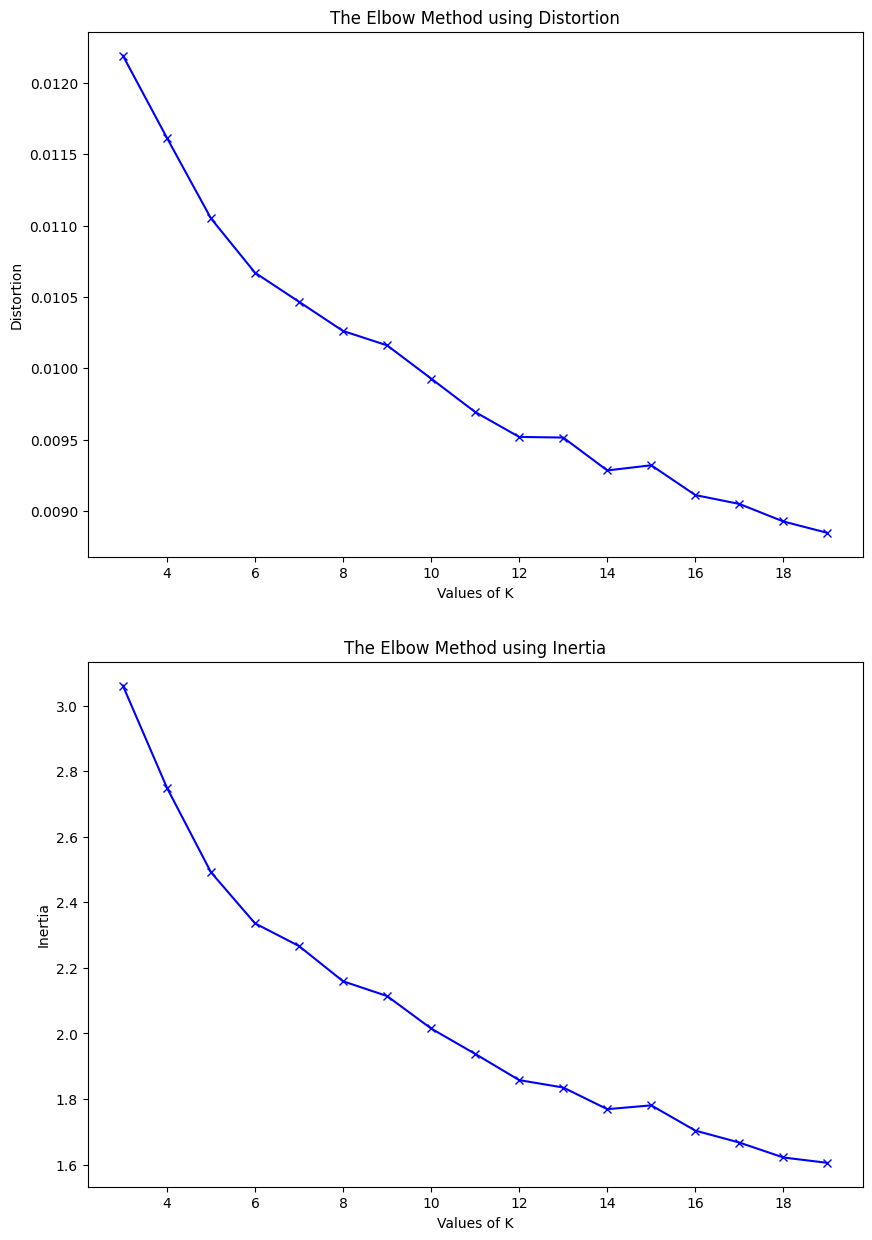

In [9]:
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(k_range, distortions, 'bx-')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')

ax2 = fig.add_subplot(212)
ax2.plot(k_range, inertias, 'bx-')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

plt.show()

In [10]:
eps_vals = np.linspace(0.0005, 0.001, 8)
min_samples_vals = list(range(100, 1000,100))

best_score = -1
best_eps = None
best_dbscan = None
best_min_samples = None

# DBSCAN clustering
for eps in eps_vals:
    for min_samples in min_samples_vals:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(df_two)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df_two, labels, sample_size=1000)
            if score > best_score:
                best_dbscan = dbscan
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

In [11]:

print("Best eps: " + str(best_eps))
print("Best score: " + str(best_score))
print("Best min samples: " + str(best_min_samples))
dbscan = best_dbscan

Best eps: 0.001
Best score: 0.0169177271790312
Best min samples: 100


In [12]:
n_clusters_values = list(range(2, 5))
best_score = -1
best_n_clusters = None
best_h_clustering = None
# Agglomerative clustering
for n_clusters in n_clusters_values:
    print("N_clusters: " + str(n_clusters))
    h_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Fit the model
    labels = h_clustering.fit_predict(df_two)
    
    # Ignore cases where the clustering resulted in only one cluster or noise
    if len(np.unique(labels)) > 1:
        score = silhouette_score(df_two, labels, sample_size=1000)
        
        # If the silhouette score is better, store these parameters as the best
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_h_clustering = h_clustering

N_clusters: 2
N_clusters: 3
N_clusters: 4


In [13]:
model = AgglomerativeClustering()
model.fit(data)

AgglomerativeClustering()

In [14]:
print("Best n_clusters: " + str(best_n_clusters))
print("Best score: " + str(best_score))

Best n_clusters: 4
Best score: 0.42087540305085397


In [15]:
h_clustering = best_h_clustering

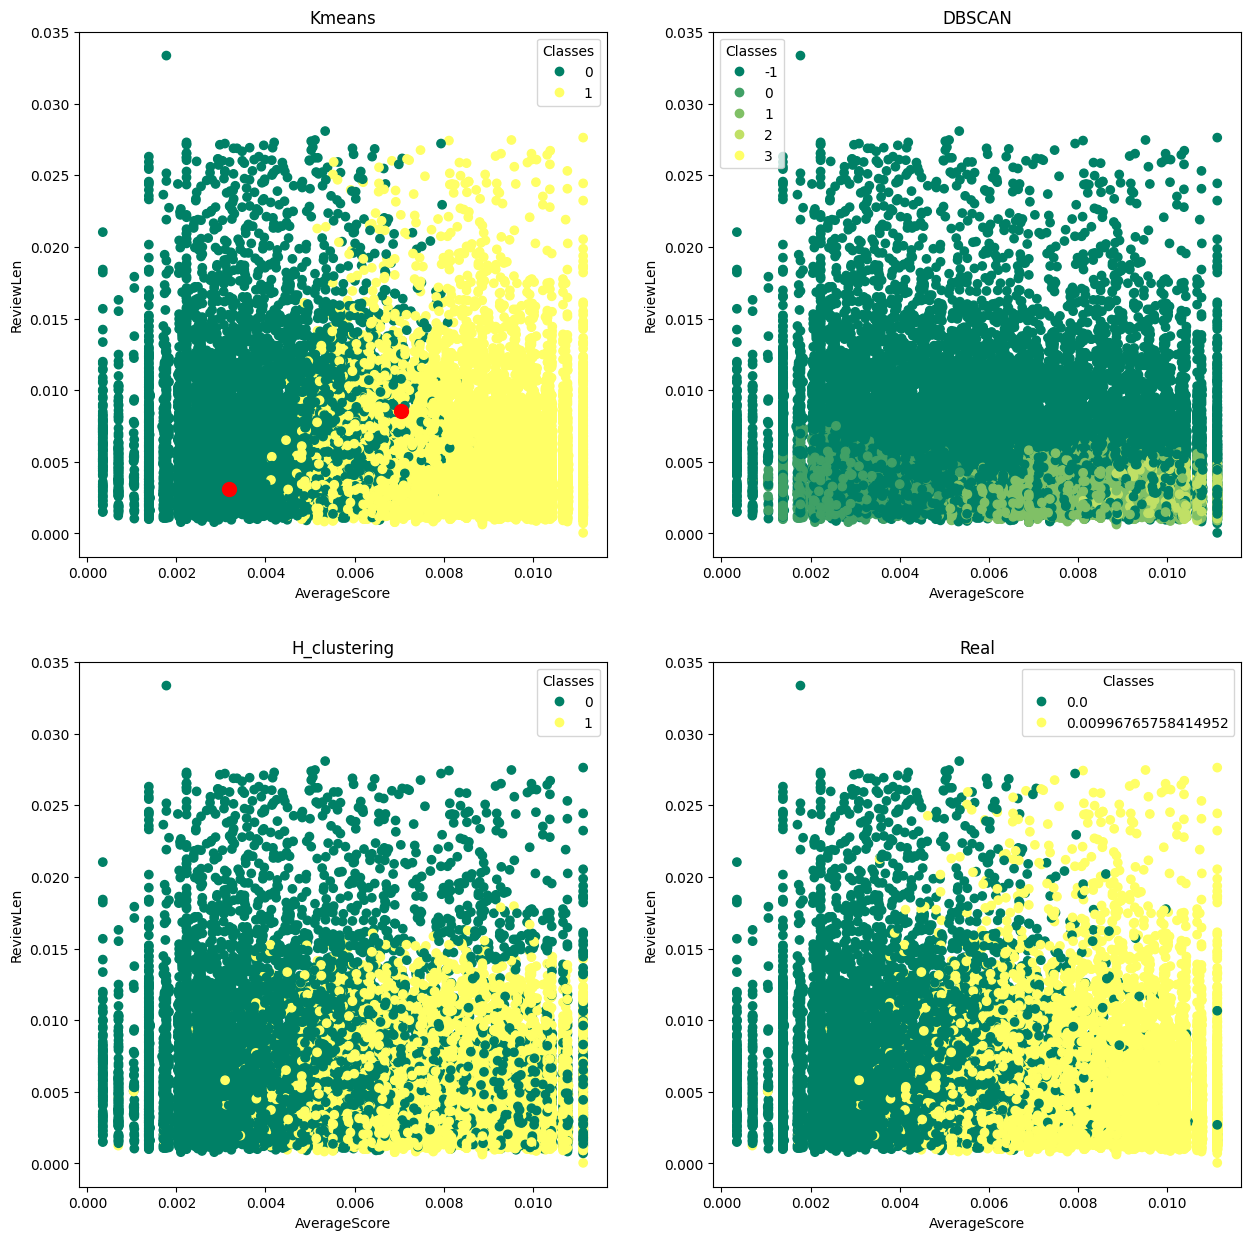

In [16]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.summer(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df['AverageScore'], df['ReviewLen'], c=c, cmap='summer')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
    ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("AverageScore")
    ax.set_ylabel("ReviewLen")
    ax.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

prepare_and_plot(ax[0][0], modelk.labels_, "Kmeans")
ax[0][0].scatter(modelk.cluster_centers_[:, 0], modelk.cluster_centers_[:, 1], s=100, c='red')
prepare_and_plot(ax[1][0], model.labels_, "H_clustering")
prepare_and_plot(ax[0][1], dbscan.labels_, "DBSCAN")
prepare_and_plot(ax[1][1], df['Recommended'], "Real")



plt.show()

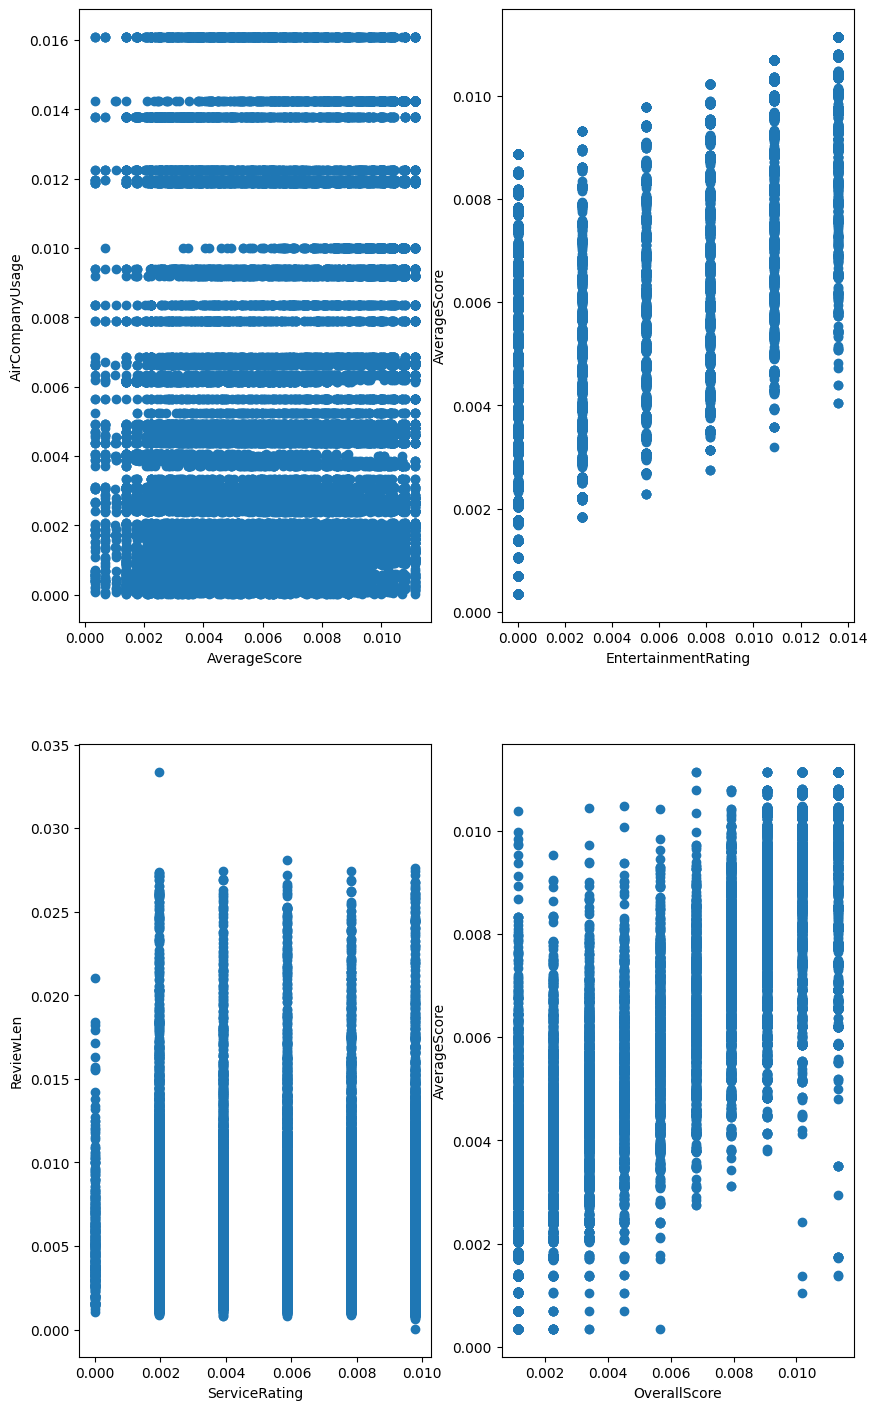

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(10, 17.5))


ax[0][0].scatter(df["AverageScore"], df["AirCompanyUsage"])
ax[0][0].set_xlabel("AverageScore")
ax[0][0].set_ylabel("AirCompanyUsage")


ax[0][1].scatter(df["EntertainmentRating"], df["AverageScore"])
ax[0][1].set_xlabel("EntertainmentRating")
ax[0][1].set_ylabel("AverageScore")


ax[1][0].scatter(df["ServiceRating"], df["ReviewLen"])
ax[1][0].set_xlabel("ServiceRating")
ax[1][0].set_ylabel("ReviewLen")


ax[1][1].scatter(df["OverallScore"], df["AverageScore"])
ax[1][1].set_xlabel("OverallScore")
ax[1][1].set_ylabel("AverageScore")

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6318321781783429
For n_clusters = 3 The average silhouette_score is : 0.5093670805166269
For n_clusters = 4 The average silhouette_score is : 0.5119274365844126
For n_clusters = 5 The average silhouette_score is : 0.4871855782570119


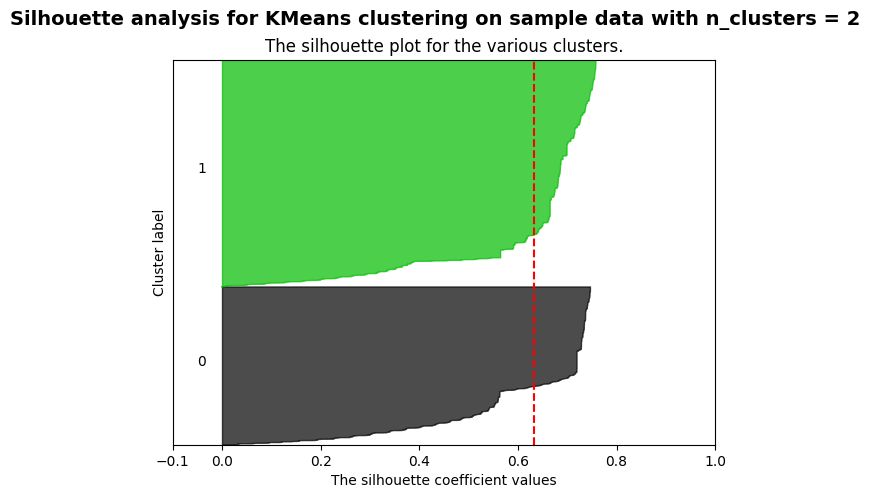

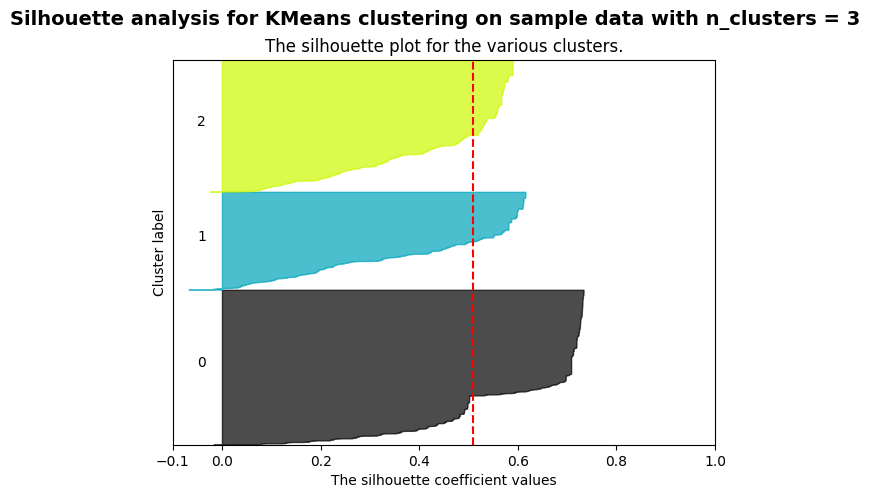

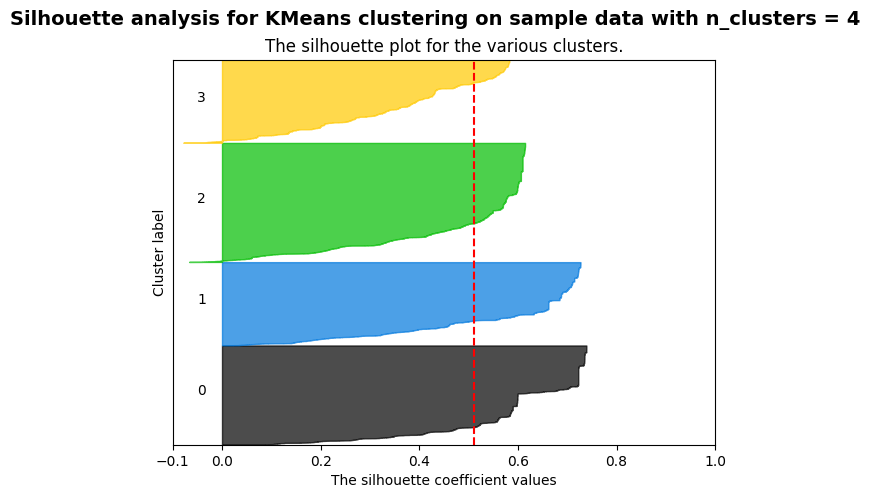

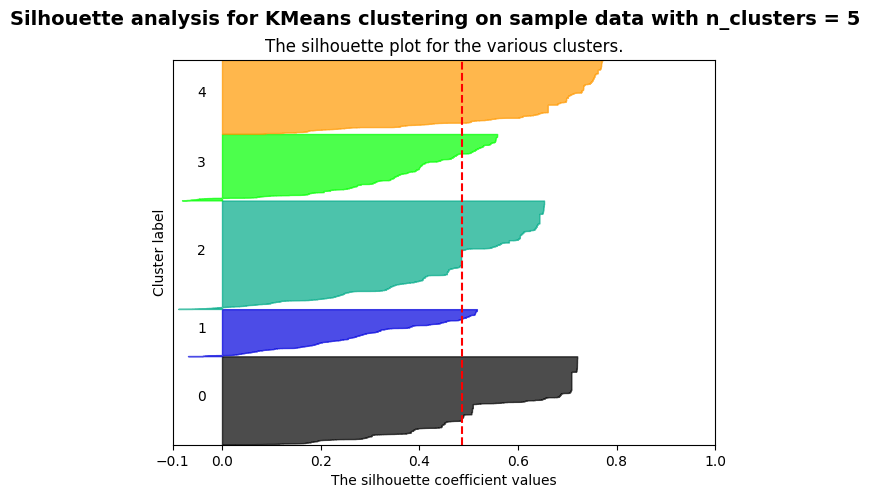

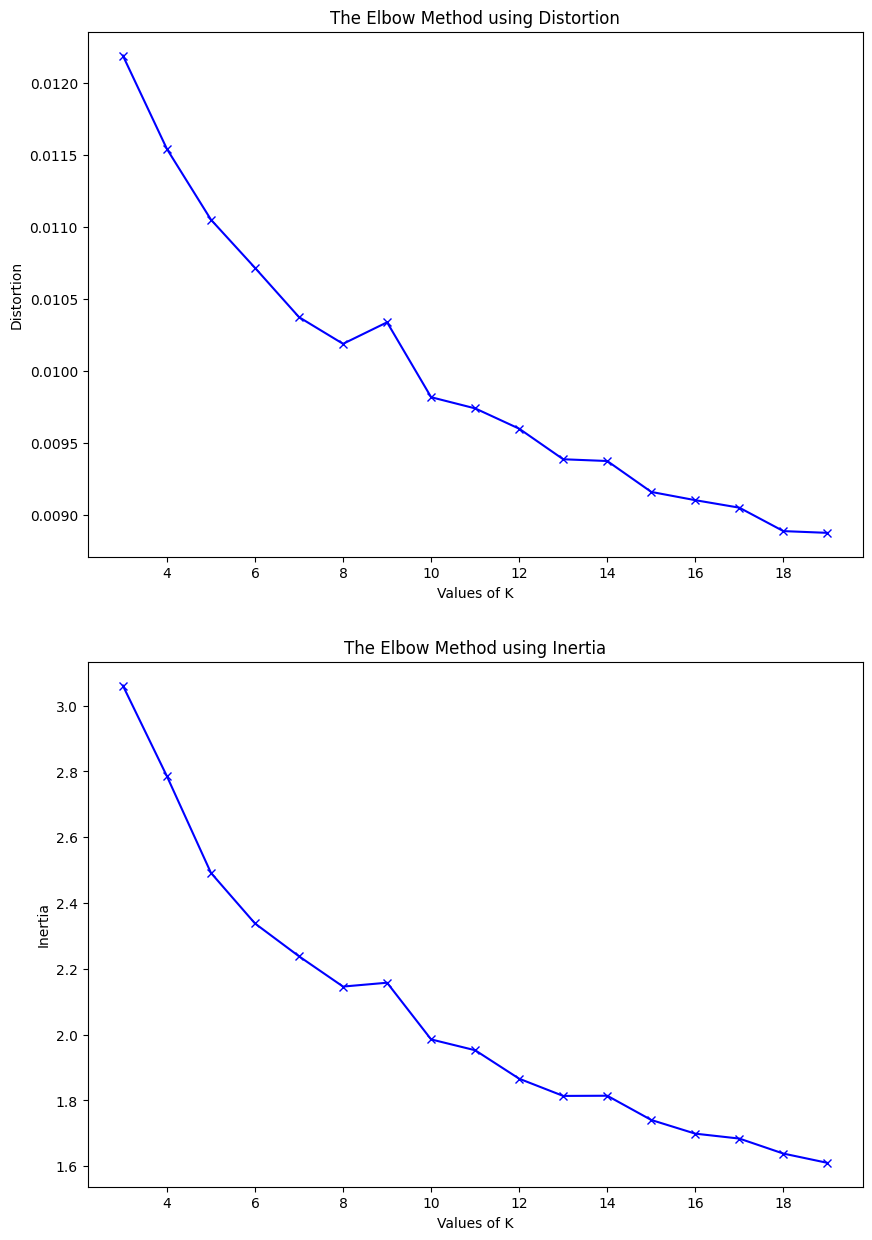

Best eps: 0.0007142857142857143
Best score: 0.41700360473568104
Best min samples: 200
N_clusters: 2
N_clusters: 3
N_clusters: 4
N_clusters: 5
N_clusters: 6
N_clusters: 7
Best n_clusters: 2
Best score: 0.6045088353798369


In [18]:
date=df[['AverageScore','EntertainmentRating']]
range_n_clusters = list(range(2,6))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(date) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(date)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(date, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(date, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

distortions = []
inertias = []
k_range = range(3, 20)
for k in k_range:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
    labels = kmeans.fit_predict(df)
 
    distortions.append(sum(np.min(cdist(df, kmeans.cluster_centers_,'euclidean'), axis=1)) / date.shape[0])
    inertias.append(kmeans.inertia_)


fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(k_range, distortions, 'bx-')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')

ax2 = fig.add_subplot(212)
ax2.plot(k_range, inertias, 'bx-')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

plt.show()

eps_vals = np.linspace(0.0005, 0.001, 8)
min_samples_vals = list(range(100, 1000,100))

best_score = -1
best_eps = None
best_dbscan = None
best_min_samples = None

# DBSCAN clustering
for eps in eps_vals:
    for min_samples in min_samples_vals:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
        labels = dbscan.fit_predict(date)
        if len(np.unique(labels)) > 1:
            score = silhouette_score(date, labels, sample_size=1000)
            if score > best_score:
                best_dbscan = dbscan
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


print("Best eps: " + str(best_eps))
print("Best score: " + str(best_score))
print("Best min samples: " + str(best_min_samples))
dbscan = best_dbscan

n_clusters_values = list(range(2, 8))
best_score = -1
best_n_clusters = None
best_h_clustering = None
# Agglomerative clustering
for n_clusters in n_clusters_values:
    print("N_clusters: " + str(n_clusters))
    h_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    
    # Fit the model
    labels = h_clustering.fit_predict(date)
    
    # Ignore cases where the clustering resulted in only one cluster or noise
    if len(np.unique(labels)) > 1:
        score = silhouette_score(date, labels, sample_size=1000)
        
        # If the silhouette score is better, store these parameters as the best
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_h_clustering = h_clustering


print("Best n_clusters: " + str(best_n_clusters))
print("Best score: " + str(best_score))


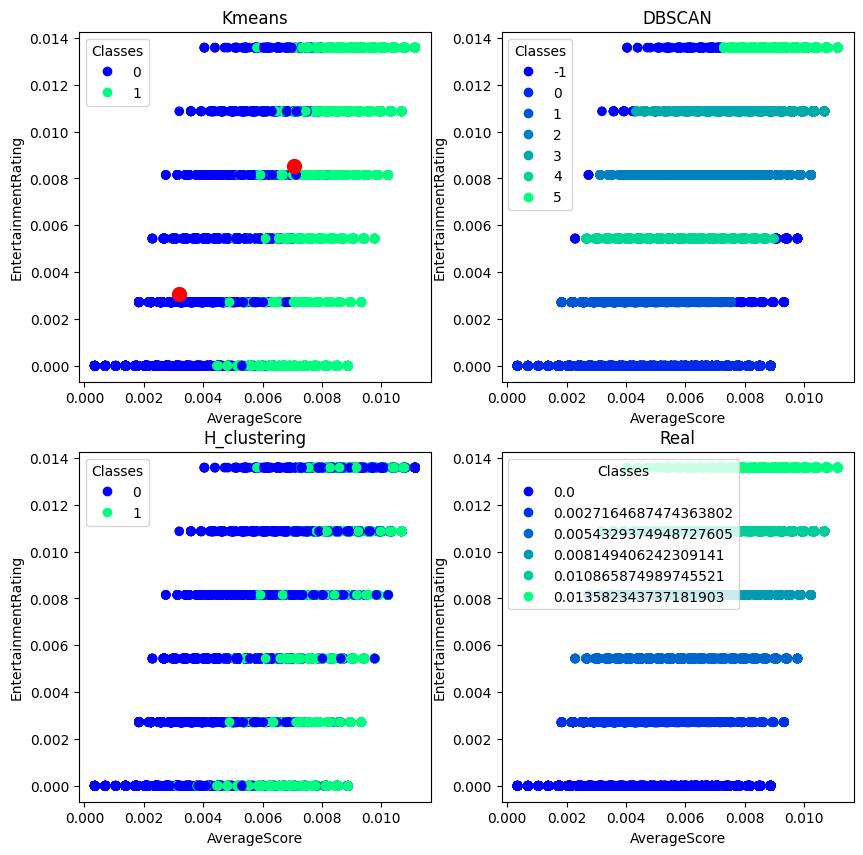

In [19]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.winter(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df['AverageScore'], df['EntertainmentRating'], c=c, cmap='winter')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]
    ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("AverageScore")
    ax.set_ylabel("EntertainmentRating")
    ax.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

prepare_and_plot(ax[0][0], modelk.labels_, "Kmeans")
ax[0][0].scatter(modelk.cluster_centers_[:, 0], modelk.cluster_centers_[:, 1], s=100, c='red')
prepare_and_plot(ax[1][0], model.labels_, "H_clustering")
prepare_and_plot(ax[0][1], dbscan.labels_, "DBSCAN")
prepare_and_plot(ax[1][1], df['EntertainmentRating'], "Real")



plt.show()

In [20]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(df)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.013202 -0.002495
1 -0.013590 -0.002681
2 -0.000158 -0.010465
3  0.000422 -0.010730
4 -0.012783  0.001006


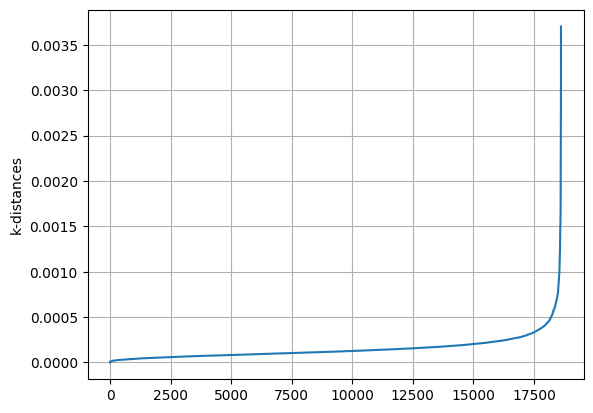

In [21]:

# предположим, что у вас есть матрица признаков X
X = pca.fit_transform(df) # просто для примера, используйте свои данные

# Устанавливаем число соседей
k = 3# например

# Создаем экземпляр класса NearestNeighbors и обучаем его
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# Расчет расстояний и индексов k ближайших соседей для каждой точки
distances, indices = nn.kneighbors(X)

# distances возвращает отсортированные расстояния до k ближайших соседей для каждой точки,
# поэтому выбираем в каждой строке расстояния до k-го соседа и сортируем их
k_distances = distances[:, -1]
k_distances = np.sort(k_distances)

plt.plot(k_distances)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

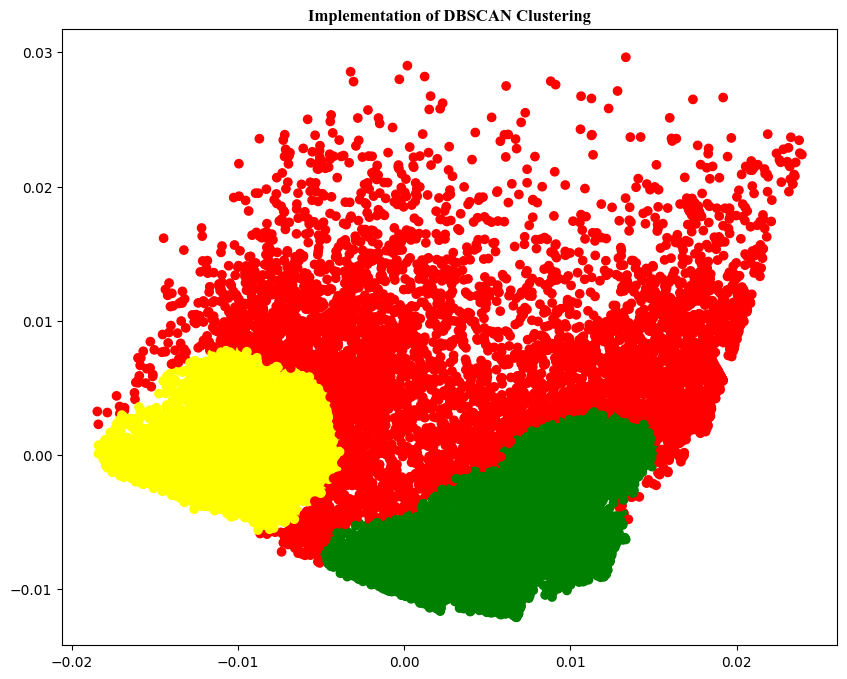

In [22]:
dbscan = DBSCAN(eps=0.002, min_samples=400).fit(x_principal)
labels = dbscan.labels_
df['cluster'] = dbscan.labels_
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red',3:'purple',4:'pink'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(10, 8))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

In [23]:
df3 = df[["ReviewLen", "AverageScore", "AirCompanyUsage"]]

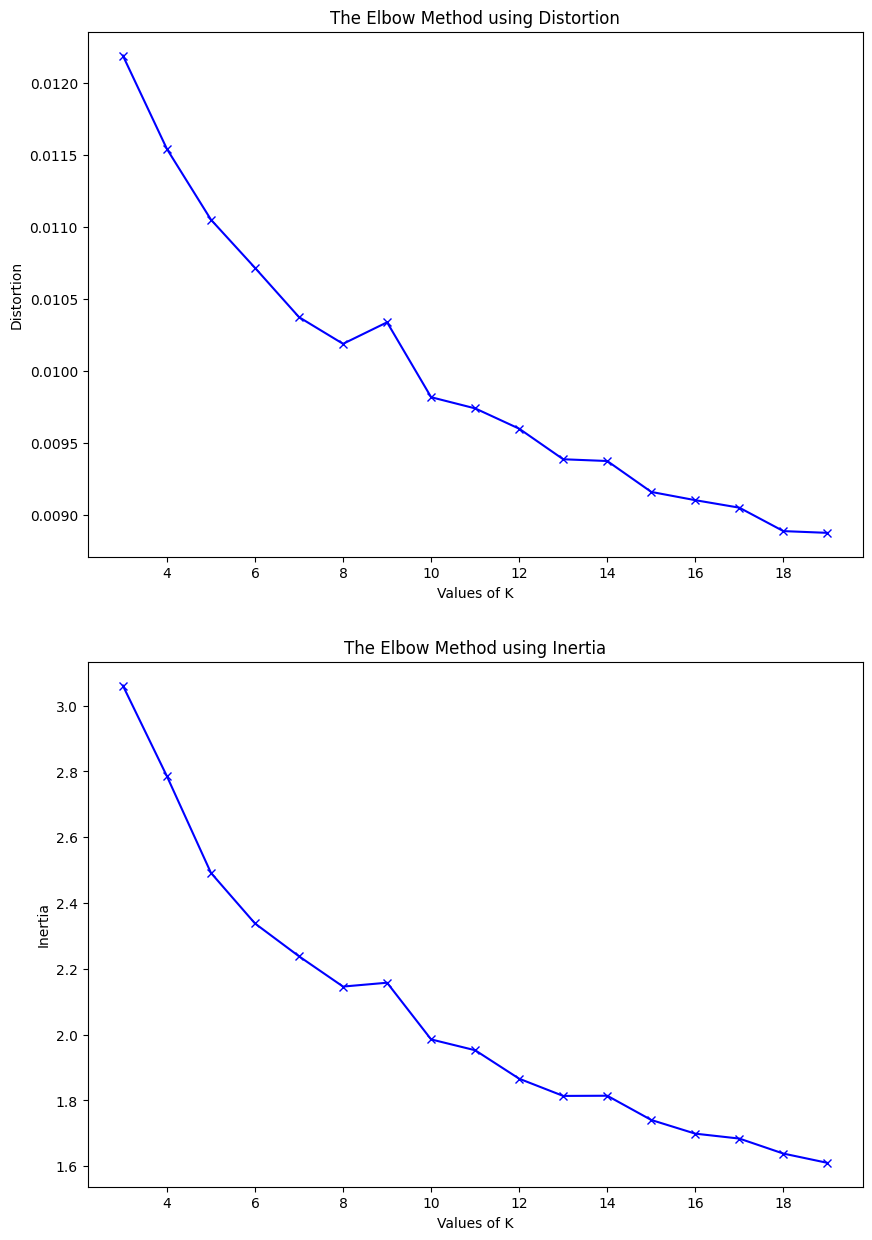

In [24]:
fig = plt.figure(figsize=(10, 15))

ax1 = fig.add_subplot(211)
ax1.plot(k_range, distortions, 'bx-')
ax1.set_xlabel('Values of K')
ax1.set_ylabel('Distortion')
ax1.set_title('The Elbow Method using Distortion')

ax2 = fig.add_subplot(212)
ax2.plot(k_range, inertias, 'bx-')
ax2.set_xlabel('Values of K')
ax2.set_ylabel('Inertia')
ax2.set_title('The Elbow Method using Inertia')

plt.show()

In [25]:
kmeans =KMeans(n_clusters=6, max_iter=300, tol=1e-4,n_init="auto", algorithm="elkan")
kmeans.fit(df3)

KMeans(algorithm='elkan', n_clusters=6, n_init='auto')

In [26]:
eps_vals = np.linspace(0.0005, 0.001, 8)
min_samples_vals = list(range(100, 1000,100))

best_score = -1
best_eps = None
best_dbscan = None
best_min_samples = None

In [27]:
# DBSCAN clustering
for eps in eps_vals:
    print("Eps: " + str(eps))
    for min_samples in min_samples_vals:
        print("Min samples: " + str(min_samples))
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)

        # Fit the model
        labels = dbscan.fit_predict(df3)

        # Ignore cases where the clustering resulted in only one cluster or noise
        if len(np.unique(labels)) > 1:
            score = silhouette_score(df3, labels, sample_size=1000)

            # If the silhouette score is better, store these parameters as the best
            if score > best_score:
                print(score)
                best_dbscan = dbscan
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

Eps: 0.0005
Min samples: 100
Min samples: 200
Min samples: 300
Min samples: 400
Min samples: 500
Min samples: 600
Min samples: 700
Min samples: 800
Min samples: 900
Eps: 0.0005714285714285715
Min samples: 100
Min samples: 200
Min samples: 300
Min samples: 400
Min samples: 500
Min samples: 600
Min samples: 700
Min samples: 800
Min samples: 900
Eps: 0.0006428571428571429
Min samples: 100
Min samples: 200
Min samples: 300
Min samples: 400
Min samples: 500
Min samples: 600
Min samples: 700
Min samples: 800
Min samples: 900
Eps: 0.0007142857142857143
Min samples: 100
-0.15979665798856985
Min samples: 200
Min samples: 300
Min samples: 400
Min samples: 500
Min samples: 600
Min samples: 700
Min samples: 800
Min samples: 900
Eps: 0.0007857142857142857
Min samples: 100
Min samples: 200
Min samples: 300
Min samples: 400
Min samples: 500
Min samples: 600
Min samples: 700
Min samples: 800
Min samples: 900
Eps: 0.0008571428571428572
Min samples: 100
Min samples: 200
Min samples: 300
Min samples: 400

In [28]:


print("Best eps: " + str(best_eps))
print("Best score: " + str(best_score))
print("Best min samples: " + str(best_min_samples))
dbscan = best_dbscan

Best eps: 0.001
Best score: 0.040369137757907396
Best min samples: 100


In [29]:
n_clusters_values = list(range(2, 6))
best_score = -1
best_n_clusters = None
best_h_clustering = None

In [30]:
# Agglomerative clustering
for n_clusters in n_clusters_values:
    print("N_clusters: " + str(n_clusters))
    h_clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model
    labels = h_clustering.fit_predict(df3)

    # Ignore cases where the clustering resulted in only one cluster or noise
    if len(np.unique(labels)) > 1:
        score = silhouette_score(df3, labels, sample_size=1000)

        # If the silhouette score is better, store these parameters as the best
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_h_clustering = h_clustering

N_clusters: 2
N_clusters: 3
N_clusters: 4
N_clusters: 5


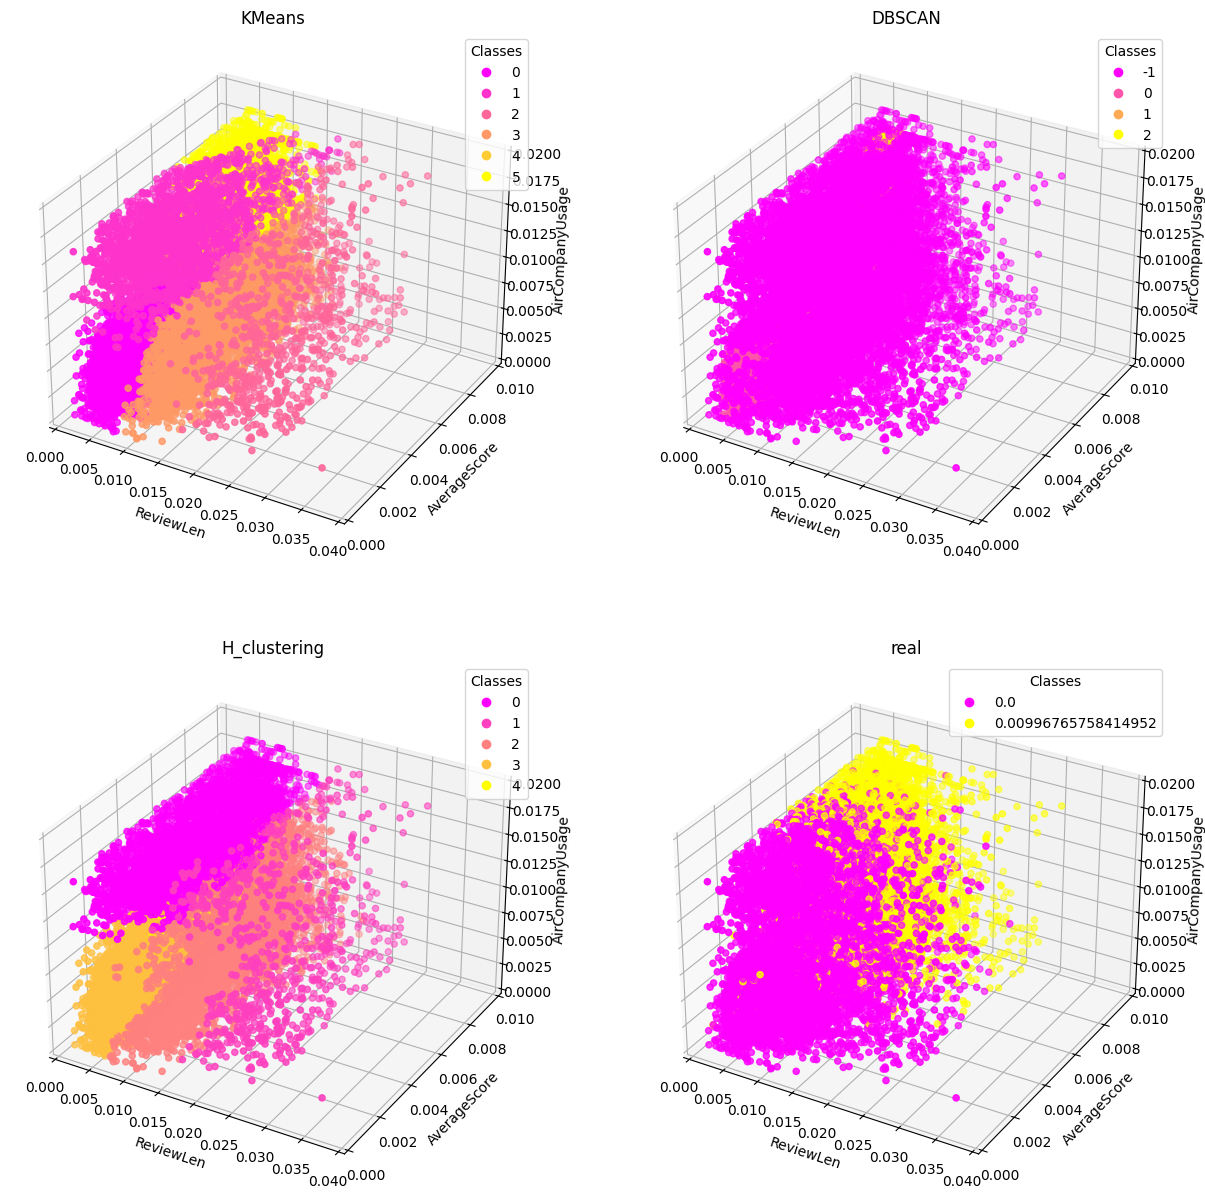

In [31]:
def prepare_and_plot(ax, c, title):
    labels = np.unique(c)  # получаем список уникальных меток
    colors = plt.cm.spring(np.linspace(0, 1, len(labels)))    # создаем массив цветов
    ax.scatter(df["ReviewLen"], df["AverageScore"], df["AirCompanyUsage"], c=c, cmap='spring')  # указываем нашу карту цветов
    # Создаем легенду в виде списка с данными о маркерах, цветах и метках
    handle_list = [plt.plot([], [], marker="o", ls="", color=color)[0] for color in colors]
    ax.legend(handle_list, labels, title='Classes')
    ax.set_xlabel("ReviewLen")
    ax.set_ylabel("AverageScore")
    ax.set_zlabel("AirCompanyUsage")
    ax.set_xlim(0, 0.04)
    ax.set_ylim(0, 0.01)
    ax.set_zlim(0, 0.02)
    ax.set_title(title)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')
# ax5 = fig.add_subplot(325, projection='3d')

prepare_and_plot(ax1, kmeans.labels_, "KMeans")
prepare_and_plot(ax2, dbscan.labels_, "DBSCAN")
prepare_and_plot(ax3, h_clustering.labels_, "H_clustering")
prepare_and_plot(ax4, df["Recommended"], "real")

plt.show()

In [32]:
df.to_csv('/Users/natalagrunskaa/Desktop/AirlineReviewsToLab4.csv', index= False )